In [1]:
import pandas as pd
import mysql.connector as mysql
import pymysql.cursors

In [2]:
koneksi = mysql.connect(
host = "localhost",
user = "root",
password = "",
database = "karyawan"   
) 

cursor = koneksi.cursor()

In [3]:
#tryin to read datam make sure the connection was succesfully
cursor.execute("SELECT * FROM customers")
tabel_customers = cursor.fetchall()
#merapikan dengan memberikan frame atau table
data_customers  = pd.DataFrame(columns = ["customerNumber","customerName","contactLastName","contactFirstName","phone","addressLine1","addressLine2","city","state","postalCode","country","salesRepEmployeeNumber","creditLimit"],
                            data = tabel_customers)
data_customers = data_customers.set_index('customerNumber')
#memanggil table yang sudah berisi data customerr

data_customers

,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
customerNumber,,,,,,,,,,,,
103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.00
112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,America,1166.0,71800.00
114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.00
121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.00
...,...,...,...,...,...,...,...,...,...,...,...,...
486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,None,Philadelphia,PA,71270,USA,1323.0,72600.00
487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,None,Brisbane,CA,94217,USA,1165.0,60300.00
489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,None,London,None,WA1 1DP,UK,1501.0,43300.00


In [4]:
sql_insert = """INSERT INTO customers (customerNumber, customerName, contactLastName, contactFirstName, phone, addressLine1, addressLine2, city, state, postalCode, country, salesRepEmployeeNumber, creditLimit) VALUES ('497','maman dekor','paiman','maman','62 8123 4567 890','None','Probolinggo','PA','67456','INA','','1002','150000')"""
cursor.execute(sql_insert)
koneksi.commit()

In [5]:
cursor.execute("SELECT * FROM customers")
tabel_customers = cursor.fetchall()
data_customers  = pd.DataFrame(columns = ["customerNumber","customerName","contactLastName","contactFirstName","phone","addressLine1","addressLine2","city","state","postalCode","country","salesRepEmployeeNumber","creditLimit"],
                            data = tabel_customers)
data_customers = data_customers.set_index('customerNumber')
data_customers

,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
customerNumber,,,,,,,,,,,,
103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.00
112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,America,1166.0,71800.00
114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.00
121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.00
...,...,...,...,...,...,...,...,...,...,...,...,...
487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,None,Brisbane,CA,94217,USA,1165.0,60300.00
489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,None,London,None,WA1 1DP,UK,1501.0,43300.00
495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,None,Boston,MA,51003,USA,1188.0,85100.00


In [6]:
sql_update = """UPDATE customers SET customerName = 'vanesh decoration', contactLastName = 'jihan', contactFirstName = 'vanesha', phone = '+62 8123 4567 890', addressLine1 = 'STI 2435' , addressLine2 = 'None' , city = 'Probolinggo' , state = 'None' , postalCode = '67237' , country = 'INA'  WHERE customerNumber = 497"""
cursor.execute(sql_update)
koneksi.commit()

In [7]:
cursor.execute("SELECT * FROM customers")
tabel_customers = cursor.fetchall()
data_customers  = pd.DataFrame(columns = ["customerNumber","customerName","contactLastName","contactFirstName","phone","addressLine1","addressLine2","city","state","postalCode","country","salesRepEmployeeNumber","creditLimit"],
                            data = tabel_customers)
data_customers = data_customers.set_index('customerNumber')
data_customers

,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
customerNumber,,,,,,,,,,,,
103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.00
112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,America,1166.0,71800.00
114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.00
121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.00
...,...,...,...,...,...,...,...,...,...,...,...,...
487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,None,Brisbane,CA,94217,USA,1165.0,60300.00
489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,None,London,None,WA1 1DP,UK,1501.0,43300.00
495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,None,Boston,MA,51003,USA,1188.0,85100.00


In [8]:
sql_update = """DELETE from customers where customerNumber = 497"""
cursor.execute(sql_update)
koneksi.commit()

In [9]:
cursor.execute("SELECT * FROM customers GROUP BY customers.customerNumber")
tabel_customers = cursor.fetchall()
data_customers  = pd.DataFrame(columns = ["customerNumber","customerName","contactLastName","contactFirstName","phone","addressLine1","addressLine2","city","state","postalCode","country","salesRepEmployeeNumber","creditLimit"],
                            data = tabel_customers)
data_customers

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,America,1166.0,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,None,Philadelphia,PA,71270,USA,1323.0,72600.00
118,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,None,Brisbane,CA,94217,USA,1165.0,60300.00
119,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,None,London,None,WA1 1DP,UK,1501.0,43300.00
120,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,None,Boston,MA,51003,USA,1188.0,85100.00


In [10]:
import numpy as np

In [11]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerNumber          122 non-null    int64  
 1   customerName            122 non-null    object 
 2   contactLastName         122 non-null    object 
 3   contactFirstName        122 non-null    object 
 4   phone                   122 non-null    object 
 5   addressLine1            122 non-null    object 
 6   addressLine2            22 non-null     object 
 7   city                    122 non-null    object 
 8   state                   49 non-null     object 
 9   postalCode              115 non-null    object 
 10  country                 122 non-null    object 
 11  salesRepEmployeeNumber  100 non-null    float64
 12  creditLimit             122 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.5+ KB


In [12]:
np.sum(data_customers.isnull())

customerNumber              0
customerName                0
contactLastName             0
contactFirstName            0
phone                       0
addressLine1                0
addressLine2              100
city                        0
state                      73
postalCode                  7
country                     0
salesRepEmployeeNumber     22
creditLimit                 0
dtype: int64

In [13]:
data_customers["addressLine2"].value_counts()

Suite 101                   2
815 Pacific Hwy             1
2nd Floor                   1
Bronz Apt. 3/6 Tesvikiye    1
Suite 750                   1
PR 334 Sentrum              1
Level 2                     1
PB 211 Sentrum              1
27-30 Merchant's Quay       1
Suite 400                   1
1 Garden Road               1
NatWest Center #13-03       1
Crowther Way 23             1
Suite 200                   1
8 Temasek                   1
Level 15                    1
Level 11                    1
Floor No. 4                 1
SEC Oy                      1
Alessandro Volta 16         1
Level 3                     1
Name: addressLine2, dtype: int64

In [14]:
data_customers["state"].value_counts()

CA               11
MA                9
NY                6
CT                4
PA                3
BC                2
Victoria          2
NSW               2
NH                1
Pretoria          1
NJ                1
NV                1
Isle of Wight     1
Osaka             1
Tokyo             1
Co. Cork          1
Québec            1
Queensland        1
Name: state, dtype: int64

In [15]:
data_customers["postalCode"].value_counts()

94217      5
10022      5
28023      3
58339      3
60528      2
          ..
1227 MM    1
75012      1
90110      1
1756       1
3004       1
Name: postalCode, Length: 94, dtype: int64

In [16]:
data_customers["salesRepEmployeeNumber"].value_counts()

1401.0    10
1504.0     9
1501.0     8
1323.0     8
1286.0     7
1370.0     7
1165.0     6
1702.0     6
1188.0     6
1337.0     6
1216.0     6
1166.0     6
1621.0     5
1611.0     5
1612.0     5
Name: salesRepEmployeeNumber, dtype: int64

In [17]:
from sklearn.impute import SimpleImputer
from scipy.stats import mode


In [18]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerNumber          122 non-null    int64  
 1   customerName            122 non-null    object 
 2   contactLastName         122 non-null    object 
 3   contactFirstName        122 non-null    object 
 4   phone                   122 non-null    object 
 5   addressLine1            122 non-null    object 
 6   addressLine2            22 non-null     object 
 7   city                    122 non-null    object 
 8   state                   49 non-null     object 
 9   postalCode              115 non-null    object 
 10  country                 122 non-null    object 
 11  salesRepEmployeeNumber  100 non-null    float64
 12  creditLimit             122 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.5+ KB


In [19]:
data_customers["addressLine2"].mode()

0    Suite 101
dtype: object

In [20]:
data_customers["state"].mode()

0    CA
dtype: object

In [21]:
data_customers["postalCode"].mode()

0    10022
1    94217
dtype: object

In [22]:
data_customers["salesRepEmployeeNumber"].mode()

0    1401.0
dtype: float64

In [23]:
data_customers["addressLine2"]=data_customers["addressLine2"].fillna(data_customers["addressLine2"].mode()[0])
data_customers["state"] = data_customers["state"].fillna(data_customers["state"].mode()[0])
data_customers["postalCode"] = data_customers["postalCode"].fillna(data_customers["postalCode"].mode()[0])
data_customers["salesRepEmployeeNumber"] = data_customers["salesRepEmployeeNumber"].fillna(data_customers["salesRepEmployeeNumber"].mode()[0])

In [24]:
data_customers.isnull().sum()

customerNumber            0
customerName              0
contactLastName           0
contactFirstName          0
phone                     0
addressLine1              0
addressLine2              0
city                      0
state                     0
postalCode                0
country                   0
salesRepEmployeeNumber    0
creditLimit               0
dtype: int64

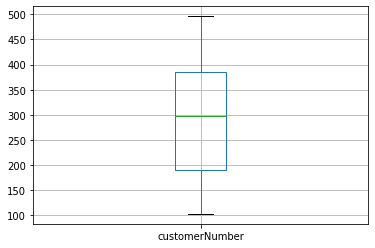

In [25]:
data_customers.boxplot(column = 'customerNumber')

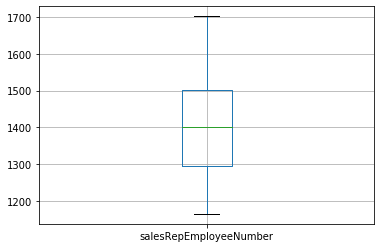

In [26]:
data_customers.boxplot(column = 'salesRepEmployeeNumber')

In [27]:
data_customers.describe()

,customerNumber,salesRepEmployeeNumber
count,122.000000,122.000000
mean,296.401639,1396.852459
std,117.077544,149.868630
min,103.000000,1165.000000
25%,191.250000,1295.250000
50%,298.500000,1401.000000
75%,384.250000,1501.000000
max,496.000000,1702.000000


In [28]:
data_customers._get_numeric_data()

,customerNumber,salesRepEmployeeNumber
0,103,1370.0
1,112,1166.0
2,114,1611.0
3,119,1370.0
4,121,1504.0
...,...,...
117,486,1323.0
118,487,1165.0
119,489,1501.0
120,495,1188.0


In [29]:
from scipy import stats

hasil_zscore = np.abs(stats.zscore(data_customers._get_numeric_data()))
print(hasil_zscore)

[[1.65872265 0.17991218]
 [1.58153353 1.5467175 ]
 [1.56438039 1.43479411]
 [1.52149754 0.17991218]
 [1.5043444  0.71789132]
 [1.47861469 1.55341752]
 [1.47003812 0.02778863]
 [1.44430841 0.71789132]
 [1.43573184 1.55341752]
 [1.4185787  0.4948134 ]
 [1.332813   0.17991218]
 [1.30708329 0.71789132]
 [1.29850672 0.02778863]
 [1.28993015 0.40101304]
 [1.27277701 1.50179437]
 [1.24704731 0.74271437]
 [1.19558789 1.21171619]
 [1.16128161 1.55341752]
 [1.11839876 1.44149414]
 [1.10982219 0.71789132]
 [1.10124562 0.74271437]
 [1.09266905 0.02778863]
 [1.07551591 0.17991218]
 [1.06693934 0.40101304]
 [1.05836277 1.39931692]
 [1.04120963 0.4948134 ]
 [1.02405649 1.50179437]
 [0.98975021 0.74271437]
 [0.94686736 0.69779124]
 [0.93829079 0.69779124]
 [0.92113765 0.71789132]
 [0.84394853 1.21171619]
 [0.81821882 0.69779124]
 [0.80964225 0.4948134 ]
 [0.79248911 1.39931692]
 [0.78391254 1.5467175 ]
 [0.77533597 0.02778863]
 [0.74960626 0.17991218]
 [0.73245312 1.50179437]
 [0.68957027 2.04449649]


In [30]:
hasil_zscore.shape

(122, 2)

In [31]:
outlier = data_customers[(hasil_zscore < 3).all(axis=1)]
print(outlier.shape)

(122, 13)


In [32]:
outlier

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Suite 101,Nantes,CA,44000,France,1370.0,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,Suite 101,Las Vegas,NV,83030,America,1166.0,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",Suite 101,Nantes,CA,44000,France,1370.0,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,Suite 101,Stavern,CA,4110,Norway,1504.0,81700.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,Suite 101,Philadelphia,PA,71270,USA,1323.0,72600.00
118,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,Suite 101,Brisbane,CA,94217,USA,1165.0,60300.00
119,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,Suite 101,London,CA,WA1 1DP,UK,1501.0,43300.00
120,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,Suite 101,Boston,MA,51003,USA,1188.0,85100.00


In [33]:
import seaborn as sns
sns.set(style="whitegrid")

In [34]:
data_baru = pd.DataFrame([])

data_baru["Keterangan"] = ["tidak ada outlier","outlier"]
data_baru["jumlah observasi"] = [122, 122-122]

data_baru

,Keterangan,jumlah observasi
0,tidak ada outlier,122
1,outlier,0


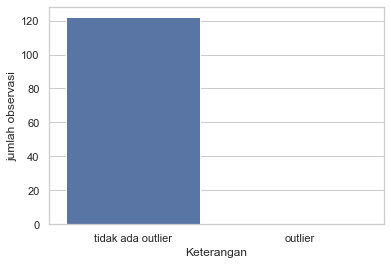

In [35]:
plot=sns.barplot(x="Keterangan",y="jumlah observasi",data=data_baru)

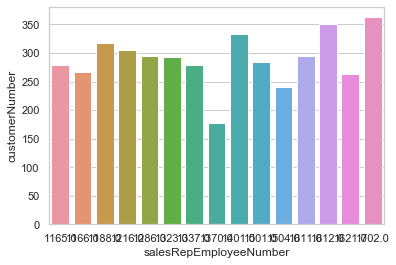

In [36]:
sns.set(style="whitegrid")
sns.barplot(x="salesRepEmployeeNumber",y="customerNumber",data=data_customers, ci=None)

In [37]:
data_customers

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Suite 101,Nantes,CA,44000,France,1370.0,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,Suite 101,Las Vegas,NV,83030,America,1166.0,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",Suite 101,Nantes,CA,44000,France,1370.0,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,Suite 101,Stavern,CA,4110,Norway,1504.0,81700.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,Suite 101,Philadelphia,PA,71270,USA,1323.0,72600.00
118,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,Suite 101,Brisbane,CA,94217,USA,1165.0,60300.00
119,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,Suite 101,London,CA,WA1 1DP,UK,1501.0,43300.00
120,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,Suite 101,Boston,MA,51003,USA,1188.0,85100.00


In [38]:
data_customers['postalCode'].value_counts()

10022      12
94217       5
28023       3
58339       3
60528       2
           ..
1227 MM     1
75012       1
90110       1
1756        1
3004        1
Name: postalCode, Length: 94, dtype: int64

In [39]:
data_customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Suite 101,Nantes,CA,44000,France,1370.0,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,Suite 101,Las Vegas,NV,83030,America,1166.0,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",Suite 101,Nantes,CA,44000,France,1370.0,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,Suite 101,Stavern,CA,4110,Norway,1504.0,81700.00


In [40]:
from sklearn import preprocessing

In [41]:
kategori = ["customerNumber","customerName","contactLastName","contactFirstName","phone","addressLine1","addressLine2","city","state","postalCode","country","salesRepEmployeeNumber","creditLimit"]

le = preprocessing.LabelEncoder()

In [42]:
for feature in kategori:
    if feature in data_customers.columns.values:
        data_customers[feature] = le.fit_transform(data_customers[feature])

In [43]:
data_customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,0,9,89,15,88,47,17,62,1,40,7,7,2
1,1,102,49,43,111,67,17,40,9,68,0,1,33
2,2,11,27,82,50,55,12,54,17,32,1,11,80
3,3,63,54,42,89,57,17,62,1,40,7,7,81
4,4,17,9,48,62,83,17,84,1,37,16,10,44


In [44]:
data_customers.dtypes

customerNumber            int64
customerName              int32
contactLastName           int32
contactFirstName          int32
phone                     int32
addressLine1              int32
addressLine2              int32
city                      int32
state                     int32
postalCode                int32
country                   int32
salesRepEmployeeNumber    int64
creditLimit               int32
dtype: object

In [45]:
data_sales = pd.cut(data_customers['salesRepEmployeeNumber'], bins=5).value_counts()
data_sales

(5.6, 8.4]       45
(8.4, 11.2]      22
(2.8, 5.6]       21
(-0.014, 2.8]    18
(11.2, 14.0]     16
Name: salesRepEmployeeNumber, dtype: int64

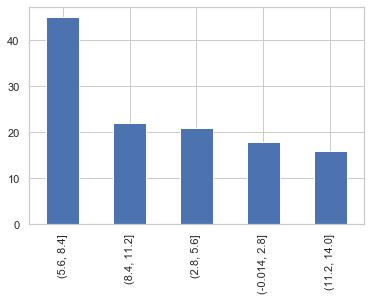

In [46]:
data_sales.plot(kind='bar')

In [47]:
label = ["aktif sekali",
        "aktif",
        "biasa",
        "kurang aktif",
        "perlu pengawasan"]

data_sales = pd.cut(data_customers['salesRepEmployeeNumber'],
                         bins = 5,
                         labels = label)

data_sales

0                 biasa
1          aktif sekali
2          kurang aktif
3                 biasa
4          kurang aktif
             ...       
117               aktif
118        aktif sekali
119        kurang aktif
120        aktif sekali
121    perlu pengawasan
Name: salesRepEmployeeNumber, Length: 122, dtype: category
Categories (5, object): [aktif sekali < aktif < biasa < kurang aktif < perlu pengawasan]

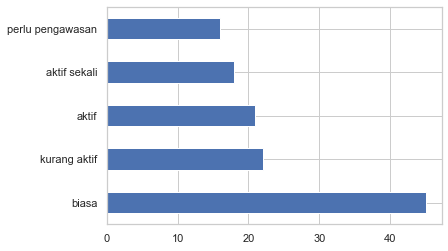

In [48]:
data_sales.value_counts().plot(kind='barh')

In [49]:
data_customers.describe()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,60.500000,60.500000,54.434426,55.795082,60.352459,60.500000,15.795082,47.950820,3.122951,44.655738,14.614754,7.139344,37.040984
std,35.362409,35.362409,31.860229,31.854509,35.144783,35.362409,3.661140,26.879545,4.097122,27.423152,10.447386,3.724646,29.862605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.250000,30.250000,28.250000,29.250000,30.250000,30.250000,17.000000,25.250000,1.000000,19.250000,7.000000,4.250000,7.250000
50%,60.500000,60.500000,53.500000,55.500000,60.500000,60.500000,17.000000,49.000000,1.000000,45.500000,12.000000,8.000000,35.500000
75%,90.750000,90.750000,81.750000,82.750000,90.750000,90.750000,17.000000,70.000000,3.750000,69.750000,26.000000,9.000000,62.750000
max,121.000000,121.000000,107.000000,110.000000,120.000000,121.000000,20.000000,95.000000,17.000000,93.000000,29.000000,14.000000,92.000000


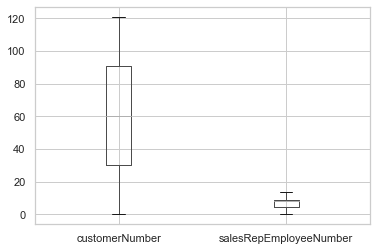

In [50]:
data_customers.boxplot(['customerNumber', 'salesRepEmployeeNumber'])

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
scaler.fit(data_customers[['salesRepEmployeeNumber']])
data_customers['salesRepEmployeeNumber_Scalled'] = scaler.transform(data_customers[['salesRepEmployeeNumber']])

In [54]:
data_customers['salesRepEmployeeNumber_Scalled'].describe()

count    122.000000
mean       0.509953
std        0.266046
min        0.000000
25%        0.303571
50%        0.571429
75%        0.642857
max        1.000000
Name: salesRepEmployeeNumber_Scalled, dtype: float64

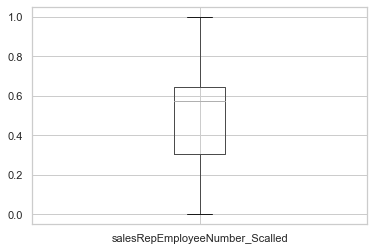

In [55]:
data_customers.boxplot(['salesRepEmployeeNumber_Scalled'])

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
bmsx = np.array([data_customers["customerNumber"],
                data_customers["salesRepEmployeeNumber"]])
bmsx.shape

(2, 122)

In [58]:
bmsx

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121],
       [  7,   1,  11,   7,  10,   0,   8,  10,   0,   5,   7,  10,   8,
          6,  13,   4,   3,   0,  12,  10,   4,   8,   7,   6,   2,   5,
         13,   4,   9,   9,  10,   3,   9,   5,   2,   1,   8,   7,  13,
         14,   1,   8,   8,   4,   8,   1,   9,   7,   8,   8,   6,   7,
         10,   5,

In [59]:
bmsxt=bmsx.transpose()
bmsxt.shape

(122, 2)

In [60]:
bms_std=StandardScaler().fit_transform(bmsxt)
bms_std

array([[-1.71791138, -0.03756569],
       [-1.68951615, -1.6551001 ],
       [-1.66112092,  1.04079058],
       [-1.63272569, -0.03756569],
       [-1.60433046,  0.77120151],
       [-1.57593523, -1.92468916],
       [-1.54754   ,  0.23202338],
       [-1.51914477,  0.77120151],
       [-1.49074955, -1.92468916],
       [-1.46235432, -0.57674382],
       [-1.43395909, -0.03756569],
       [-1.40556386,  0.77120151],
       [-1.37716863,  0.23202338],
       [-1.3487734 , -0.30715476],
       [-1.32037817,  1.57996872],
       [-1.29198294, -0.84633289],
       [-1.26358771, -1.11592196],
       [-1.23519248, -1.92468916],
       [-1.20679725,  1.31037965],
       [-1.17840202,  0.77120151],
       [-1.15000679, -0.84633289],
       [-1.12161156,  0.23202338],
       [-1.09321633, -0.03756569],
       [-1.0648211 , -0.30715476],
       [-1.03642587, -1.38551103],
       [-1.00803064, -0.57674382],
       [-0.97963542,  1.57996872],
       [-0.95124019, -0.84633289],
       [-0.92284496,

In [61]:
pcafs=PCA(n_components=0.70,whiten=True)
bmsfs_pca=pcafs.fit_transform(bms_std)

In [62]:
print('Original number of features:', bms_std.shape[1])
print('Reduced numer of features:', bmsfs_pca.shape[1])

Original number of features: 2
Reduced numer of features: 2


In [63]:
datafs_pca=pd.DataFrame(bmsfs_pca, columns=["PC1","PC2"])
datafs_pca

,PC1,PC2
0,1.190981,-1.231939
1,2.269113,-0.025232
2,0.420855,-1.980896
3,1.133188,-1.169485
4,0.565226,-1.741612
...,...,...
117,-0.697153,1.599046
118,0.198079,2.608104
119,-1.467279,0.850089
120,-0.206248,2.254444


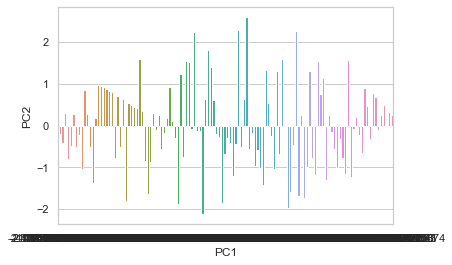

In [64]:
sns.set(style="whitegrid")
sns.barplot(x="PC1",y="PC2",data=datafs_pca, ci=None)

In [65]:
datafs_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     122 non-null    float64
 1   PC2     122 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


In [67]:
cursor.execute("CREATE TABLE hasil_praproses (id_hasil INT(11) NOT NULL AUTO_INCREMENT,PC1 VARCHAR(30) NOT NULL,PC2 VARCHAR(30) NOT NULL, PRIMARY KEY (id_hasil))")

In [68]:
for i in bms_std:
    sql = "INSERT INTO hasil_praproses (PC1,PC2) VALUES (%s,%s)"
    val = (float(i[0]),float(i[1]),)
    cursor.execute(sql,val)
    
    print(i,"Telah Ditambahkan")
    koneksi.commit()

[-1.71791138 -0.03756569] Telah Ditambahkan
[-1.68951615 -1.6551001 ] Telah Ditambahkan
[-1.66112092  1.04079058] Telah Ditambahkan
[-1.63272569 -0.03756569] Telah Ditambahkan
[-1.60433046  0.77120151] Telah Ditambahkan
[-1.57593523 -1.92468916] Telah Ditambahkan
[-1.54754     0.23202338] Telah Ditambahkan
[-1.51914477  0.77120151] Telah Ditambahkan
[-1.49074955 -1.92468916] Telah Ditambahkan
[-1.46235432 -0.57674382] Telah Ditambahkan
[-1.43395909 -0.03756569] Telah Ditambahkan
[-1.40556386  0.77120151] Telah Ditambahkan
[-1.37716863  0.23202338] Telah Ditambahkan
[-1.3487734  -0.30715476] Telah Ditambahkan
[-1.32037817  1.57996872] Telah Ditambahkan
[-1.29198294 -0.84633289] Telah Ditambahkan
[-1.26358771 -1.11592196] Telah Ditambahkan
[-1.23519248 -1.92468916] Telah Ditambahkan
[-1.20679725  1.31037965] Telah Ditambahkan
[-1.17840202  0.77120151] Telah Ditambahkan
[-1.15000679 -0.84633289] Telah Ditambahkan
[-1.12161156  0.23202338] Telah Ditambahkan
[-1.09321633 -0.03756569] Telah 

In [69]:
from pandas import DataFrame, read_csv

In [70]:
data_customers.to_csv("data_customers_hasil.csv", index =False)

In [71]:
data_customers = read_csv("data_customers_hasil.csv")

In [72]:
data_customers

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,salesRepEmployeeNumber_Scalled
0,0,9,89,15,88,47,17,62,1,40,7,7,2,0.500000
1,1,102,49,43,111,67,17,40,9,68,0,1,33,0.071429
2,2,11,27,82,50,55,12,54,17,32,1,11,80,0.785714
3,3,63,54,42,89,57,17,62,1,40,7,7,81,0.500000
4,4,17,9,48,62,83,17,84,1,37,16,10,44,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,79,87,92,81,4,17,72,12,59,28,5,34,0.357143
118,118,101,98,96,92,32,17,14,1,75,28,0,22,0.000000
119,119,38,93,99,10,7,17,45,1,91,27,9,9,0.642857
120,120,37,30,101,99,54,17,10,5,46,28,2,49,0.142857
